# ASTR 540 Homework 1 - Ansh Gupta

## Problem 1

It's important to have a precise definition of the word 'galaxy' because having accurate terminology ensures that astronomers can communicate clearly and exactly about the class of objects that they are observing and studying. Although some galaxies can be intuitively separated from other kinds of objects like star clusters, there have been increaing numbers of objects that blur the lines between galaxy or not based on previously used definitions. Specifically, ultra-compact dwarfs (UCDs), ultra-faint sattelites of the Milky Way, and tidal dwarfs (TDs) have challenged previous definitions for what a galaxy is.

At a base level, the definition of a galaxy requires the presence of dark matter, as opposed to clusters. However, this isn't an ideal definition since dark matter is still theoretical. Some previous definitions that proved to be ambiguous are size based classifications (eg. half-light radius minimums), which failed because smaller and less luminous populations of stars kept getting discovered that had kinematics/stellar populations consistent with galaxies; and a requirement for the complexity of stellar populations, which failed as certain globular clusters were found that had non-trivial spreads in their populations.

Instead, the authors propose a definition that is related to but slightly more general than the dark matter definition. They propose that a galaxy is any group of stars bound by gravity which can't be explained by Newton's laws given their baryonic mass. If kinematics can be derived for a galaxy, this can often be enough to directly test if the motion can be explain by Newtonian gravity. However, they authors propose an indirect way to test for the presence of a deep gravitational well. Supernovae are extremely energetic, and eject high-metallicity material at very high speeds. A cluster of stars without dark matter won't be able to hold onto the 'ejecta' from supernovae, and thus won't form multiple populations of stars enriched with new elements. In contrast, the deep potential wells of galaxies can funnel supernovae winds back into new stars, causing a variety of metallicities throughout its stellar population.

## Problem 2

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
# Absolute magnitude is distance independent.
M_sun = M_1 = 4.83
print('Sunlike star absolute magnitude =', M_1)

# M = m - 5 * log(d) + 5
m_1 = M_1 + 5*np.log10(8000) - 5
print(f'Sunlike star apparent magnitude = {m_1:.3}')

Sunlike star absolute magnitude = 4.83
Sunlike star apparent magnitude = 19.3


In [3]:
# M1 = M2 - 2.5 * log(L1/L2)
M_2 = M_sun - 2.5*np.log10(1e11)
print('Galaxy absolute magnitude =', M_2)

# M = m - 5 * log(d) + 5
m_2 = M_2 + 5*np.log10(1e6) - 5
print(f'Galaxy apparent magnitude = {m_2:.3}')

Galaxy absolute magnitude = -22.67
Galaxy apparent magnitude = 2.33


## Problem 3

$F = \frac{L}{4\pi d^2}$\
Objects of equal absolute magnitude have equal luminosities, so the ratio of their fluxes is just\
$\frac{F_1}{F_2} = \frac{d_2^2}{d_1^2} = \left( \frac{d_2}{d_1} \right)^2 $\

$M_1 = M_2$\
$m_1 - 5log(d_1) + 5 = m_2 - 5log(d_2) + 5$\
$m_1 - m_2 = 5log \left( \frac{d_1}{d_2} \right) $\
$\frac{d_1}{d_2} = 10^{\frac{m_1 - m_2}{5}} $

The ratio of volumes of spheres with radii d are:\
$V_1 \div V_2 = \frac{4}{3}\pi d_1^3 \div \frac{4}{3}\pi d_2^3 = \left(\frac{d_1}{d_2}\right)^3 $

In [4]:
m_diff = 4
d_ratio = 10**(m_diff/5)
vol_ratio = d_ratio**3
print(f'Ratio of volumes at which an object of a given absolute magnitude would be observable: {vol_ratio:.5}')

Ratio of volumes at which an object of a given absolute magnitude would be observable: 251.19


## Problem 4

In [422]:
sun_M = 4.67
sun_d = 4.84e-6 # sun distance in pc
sun_m = sun_M + 5*np.log10(sun_d) - 5

obs_m = 16
obs_d = sun_d * 10**((obs_m - sun_m)/5)
print(f'a) Distance at which Sun-like stars could be resolved to 20 μas: {obs_d:.6} pc')
print('The error budget given on these measurements is at 10%, which should propagate \
linearly through the distance equation')

a) Distance at which Sun-like stars could be resolved to 20 μas: 1845.02 pc
The error budget given on these measurements is at 10%, which should propagate linearly through the distance equation


With the Gaia apparent magnitude, the website explains how to compute the uncertainty in the parallax. As a sanity check, the apparent magnitude turns out to be ~15 and the number I compute is very close to the one from the corresponding row from the "Astrometric performance" table. With the parallax uncertainty of ~17 μas for this object, we can convert this to a proper motion uncertainty using the table just below the previous one, and use the distance we calculate to get an on-sky velocity.

The table under the section titled "Gaia Data Release 3 (Gaia DR3)" lists the radial velocity uncertainties as constants which are plugged into an equation. For the Sun's spectral type (G2V), read off the constants from the G2 column.

In [439]:
obs_M_2 = -3.3
obs_d_2 = 50*1e3
obs_m_2 = obs_M_2 + 5*np.log10(obs_d_2) - 5

z = 10**(0.4*(obs_m_2-15))
T = 0.527
parallax_error_2 = T * (40 + 800*z + 30*z**2)**(1/2)

# From website, proper motion error = 0.27 * sigma_pi (parallax standard error) [μas/yr]
proper_motion_err = 0.27 * parallax_error_2
proper_motion_err_rad = proper_motion_err * 1e-6 / 206265
sigma_vsky = (obs_d_2 * 3.09e13) * proper_motion_err_rad / 3600 / 24 / 365 # pc to km and yr to s
print(f"b) Approximate uncertainty in on-sky velocity of Sun-like star in LMC: {sigma_vsky:.3} km/s")

a = 1.00
b = 5.50
sigma_floor = 0.13
G_RVS = 14.0

sigma_vrad = sigma_floor + b*np.exp(a * (obs_m_2 - G_RVS))
print(f"Approximate uncertainty in radial velocity of Sun-like star in LMC: {sigma_vrad:.3} km/s")
print("These are both a lot lower than the Sun's own orbital velocity of ~ 220 km/s")

b) Approximate uncertainty in on-sky velocity of Sun-like star in LMC: 1.09 km/s
Approximate uncertainty in radial velocity of Sun-like star in LMC: 18.3 km/s
These are both a lot lower than the Sun's own orbital velocity of ~ 220 km/s


## Problem 5

In [191]:
df = pd.read_csv('cluster_18.dat', names=['g', 'r'], delimiter=' ')
color = df['g'] - df['r']
mag = df['r']

In [294]:
iso_df = pd.read_fwf('iso_sdss/sdss/iso_1.txt')
iso_2_df = pd.read_fwf('iso_sdss/sdss/iso_2.txt')
iso_3_df = pd.read_fwf('iso_sdss/sdss/iso_3.txt')
start_index = 70

iso_color = iso_df['g'].astype(float) - iso_df['r'].astype(float)
iso_color = iso_color.values[start_index:]
iso_mag = iso_df['r'].astype(float)
iso_mag = iso_mag.values[start_index:]

iso_2_color = iso_2_df['g'].astype(float) - iso_2_df['r'].astype(float)
iso_2_color = iso_2_color.values[start_index:]
iso_2_mag = iso_2_df['r'].astype(float)
iso_2_mag = iso_2_mag.values[start_index:]

iso_3_color = iso_3_df['g'].astype(float) - iso_3_df['r'].astype(float)
iso_3_color = iso_3_color.values[start_index:]
iso_3_mag = iso_3_df['r'].astype(float)
iso_3_mag = iso_3_mag.values[start_index:]

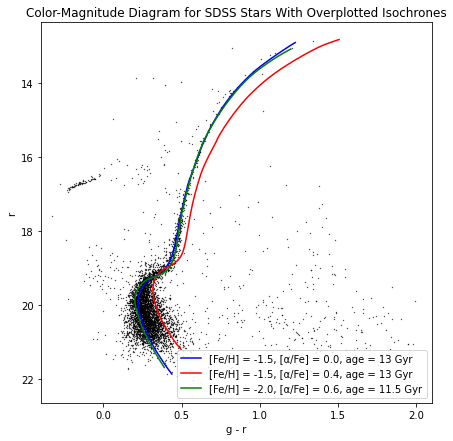

In [318]:
plt.figure(figsize=(7, 7))
plt.scatter(color, mag, c='black', s=0.1)

offset = 15.9
offset_2 = 15.3
offset_3 = 16.1
plt.plot(iso_color, iso_mag+offset, c='blue', label=r'[Fe/H] = -1.5, [α/Fe] = 0.0, age = 13 Gyr')
plt.plot(iso_2_color, iso_2_mag+offset_2, c='red', label=r'[Fe/H] = -1.5, [α/Fe] = 0.4, age = 13 Gyr')
plt.plot(iso_3_color, iso_3_mag+offset_3, c='green', label=r'[Fe/H] = -2.0, [α/Fe] = 0.6, age = 11.5 Gyr')

plt.gca().invert_yaxis()
plt.title("Color-Magnitude Diagram for SDSS Stars With Overplotted Isochrones")
plt.xlabel('g - r')
plt.ylabel('r')
plt.xlim(-0.4, 2.1)
plt.legend()

b)\
(i) Stars fainter than r $\sim$ 22 are likely too faint to be detected. Stars above r $\sim$ 13 are extremely luminous, so may not be common enough to be represented in this population. Otherwise, they may have all burned out by now and only be left as remnants.

(ii) Stars in this region may be variable stars, so their magnitude has significant variability over short periods of time causing large uncertainties in their positions on the color-mag diagram.

(iii) These stars may be background stars not part of the globular cluster. Since they're not at the same distance, and also have different ages/compositions, they are not a true part of this stellar population.

c)\
I fitted a few isochrones by eye that seem roughly consistent with the data. From this, it seems like the uncertainties in both $[Fe/H]$ and $[α/Fe]$ are around 0.5-1, and the uncertainty in the age of the cluster is around 1-2 Gyr. The distance to the cluster can be calculated since we know the offset between the apparent magnitudes (real data) and absolute magnitude (isochrones). Unfortunately I'm not sure how to account for foreground reddening, so that puts additional uncertainty on the results. But using the blue isochone:

In [322]:
distmod = offset
cluster_d = 10**(1 + distmod/5)
print(f'Distance to star cluster: {cluster_d:.7} pc')

distmod_unc = 0.2
cluster_d_unc = 10**(1 + (distmod + distmod_unc)/5) - cluster_d
print(f'Approximate uncertainty in distance to star cluster: {cluster_d_unc:.7} pc ~= 1000-2000 pc')

Distance to star cluster: 15135.61 pc
Approximate uncertainty in distance to star cluster: 1460.257 pc ~= 1000-2000 pc


## Problem 6

In [394]:
p = 0.546
d_barn = 1/p
print(f'a) Distance to Barnard\'s Star: {d_barn:.4} pc')

rad_proper_motion = 10.34/206265
v_tangent_pc = rad_proper_motion * d_barn
print(f'b) Tangential velocity = {v_tangent_pc:.2e} pc/year ~ 90 km/s')

v_rad = -108
v_tangent = v_tangent_pc * 977812
v = np.sqrt(v_rad**2 + v_tangent**2)
angle = np.arctan2(v_tangent, -1*v_rad)
print(f'c) Space velocity = {v:.5} km/s; angle = {angle*180/np.pi:.3} degrees')
print('*This angle is between the space velocity of Barnard\'s Star and the line connecting it to the Solar System')

# Draw a triangle, where one vertex is the Sun (where the right angle is), one vertex is the current position of 
# Barnard's Star, and the third is its position when it has moved 'completely radially' towards us. The shortest
# distance will then be a perpendicular bisector dropped down from the 'Sun vertex' onto the line representing
# the motion of the star. This divides the entire right triangle up into small ones which can be individually analyzed
# to find the travel time to the closest point (where the bisector hits the path of the star) and its distance.

# cos(angle) = distance_to_travel / current_distance
distance_to_travel = np.cos(angle) * d_barn
travel_time = distance_to_travel / (v/977812) # convert velocity to pc/yr
print(f'd) Time to closest approach: {travel_time:.6} years')

# sin(angle) = closest_distance / current_distance
closest_distance = np.sin(angle) * d_barn
print(f'e) Separation distance at closest approach: {closest_distance:.3} pc')

# m1 - m2 = 5log(d1/d2)
m_current = 9.54
m_closest = 5*np.log10(closest_distance/d_barn) + m_current
print(f'f) Apparent magnitude at closest approach: {m_closest:.3}')

a) Distance to Barnard's Star: 1.832 pc
b) Tangential velocity = 9.18e-05 pc/year ~ 90 km/s
c) Space velocity = 140.44 km/s; angle = 39.7 degrees
*This angle is between the space velocity of Barnard's Star and the line connecting it to the Solar System
d) Time to closest approach: 9806.17 years
e) Separation distance at closest approach: 1.17 pc
f) Apparent magnitude at closest approach: 8.57


## Problem 7

Looking at Figure 1.10 in S&G shows the orientation of galactic coordinates. We can use the equation on slide 24 of lecture 5 to determine the expected sign of the velocities.

At longitudes between 0 and 90 degrees, sin(l) is always positive. However, this slice of the MW includes stars closer to the galactic center which complete an orbit more quickly than us, which will appear to move away, and stars further out in the disk that the Sun will 'catch up' to as it completes an orbit more quickly, and this latter population will appear to be moving towards us. Numerically, it includes stars that have a greater and lesser period than the Sun, so V/R can both be greater than and less than V0/R0. As a result, there are stars that should appear to be moving both towards and away from us and the sign of V_r can be both positive and negative. Comparing to S&G figure 2.20, we do indeed see V_r has both signs.

Between 90 and 180 degrees, sin(l) is always positive. However, this quadrant only contains stars that are exterior to the Sun's orbit, so V/R < V0/R0, and thus V_r as a whole will always be negative. This makes intuitive sense, since the Sun is 'catching up' to these stars and they should appear to move towards us. Comparing to S&G figure 2.20, this trend generally seems true but there are some stars with slightly positive V_r, which might reflect the fact that the orbits are not perfectly circular.

Between -180 and -90 degrees, sin(l) is always negative. This quadrant also only contains stars exterior to the Sun, so V/R < V0/R0 and V_r as a whole will be positive. Logically, this makes sense as the Sun 'outpaces' these stars and they appear to move away from us. S&G reflects this accurately for the most part, but again some stars having slightly positive velocities means our approximation of circular orbits is probably bad (and we ignore proper motions, etc.)

Between -90 and 0 degrees, sin(l) is always negative. But this quadrant again has stars both interior to and exterior to the Sun, so V/R can both be greater than and less than V0/R0 and V_r can be both positive and negative. This is accurately reflected in the plot.